# Train a DNN on MNIST

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [2]:
from mnist_model import data, plot, model

/home/bw/.conda/envs/mnist-model/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the data

In [3]:
train_img, train_lab, val_data = data.mnist_train_kaggle(
                                    '../data/train.csv')

input_size = (784,)
img_size = (28,28,1)

print("Training examples: ", len(train_img))
print("Validataion examples: ", len(val_data[0]))

Training examples:  37800
Validataion examples:  4200


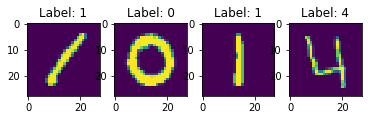

In [4]:
plot.plot_some(train_img, data.classes(train_lab))

# Construct the model

In [5]:
network = model.MNIST_model()
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
__________

# Train the model

In [6]:
network.train(x=train_img,
          y=train_lab,
          val_data=val_data,
          log_dir='../logs/')

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 5s 126us/step - loss: 0.2090 - acc: 0.9354 - val_loss: 0.0829 - val_acc: 0.9717
Epoch 2/20
37800/37800 [==============================] - 4s 95us/step - loss: 0.0526 - acc: 0.9839 - val_loss: 0.0424 - val_acc: 0.9864
Epoch 3/20
37800/37800 [==============================] - 4s 94us/step - loss: 0.0363 - acc: 0.9886 - val_loss: 0.0326 - val_acc: 0.9895
Epoch 4/20
37800/37800 [==============================] - 4s 94us/step - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0338 - val_acc: 0.9900
Epoch 5/20
37800/37800 [==============================] - 4s 94us/step - loss: 0.0208 - acc: 0.9935 - val_loss: 0.0276 - val_acc: 0.9914
Epoch 6/20
37800/37800 [==============================] - 4s 93us/step - loss: 0.0178 - acc: 0.9945 - val_loss: 0.0390 - val_acc: 0.9893
Epoch 7/20
37800/37800 [==============================] - 4s 94us/step - loss: 0.0131 - acc: 0.9957 - val_loss: 0.0472 - val_acc

# Run the model

Accuracy:  99.11904761904762 %


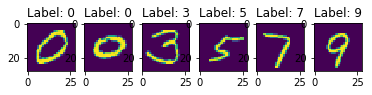

In [7]:
p = data.classes(network.model.predict(val_data[0]))
accuracy = sum(p == data.classes(val_data[1])) / len(val_data[1])
print('Accuracy: ', accuracy*100, '%')
plot.plot_some(val_data[0], p, 6)

# Save the model

In [8]:
network.save('../models/')